In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

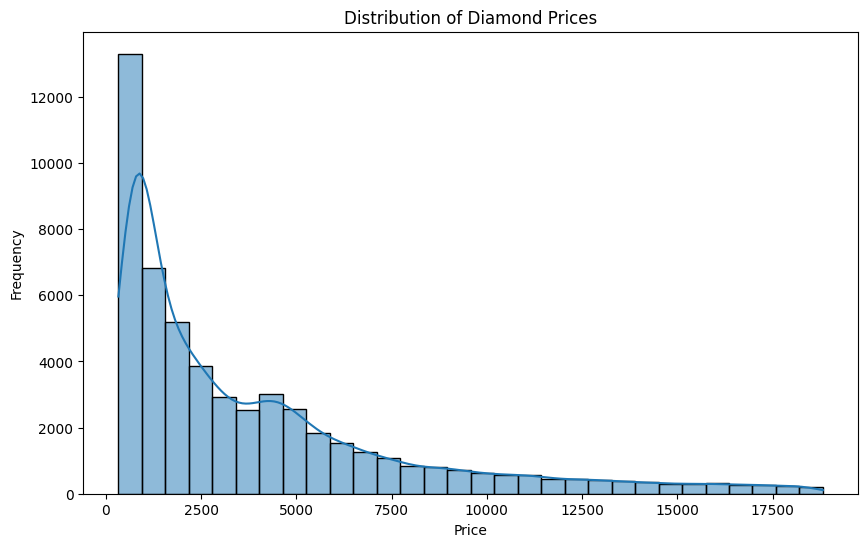

In [6]:
plt.figure(figsize=(10,  6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

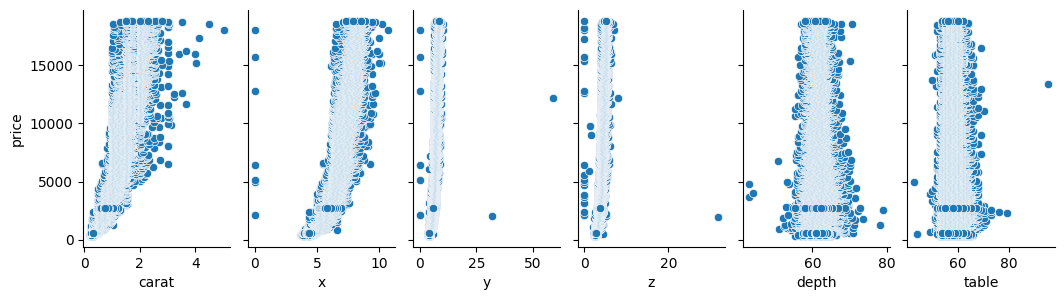

In [7]:
sns.pairplot(data, x_vars=['carat', 'x', 'y', 'z', 'depth', 'table'], y_vars = ['price'], kind = 'scatter', height = 3, aspect = 0.6)
plt.show()

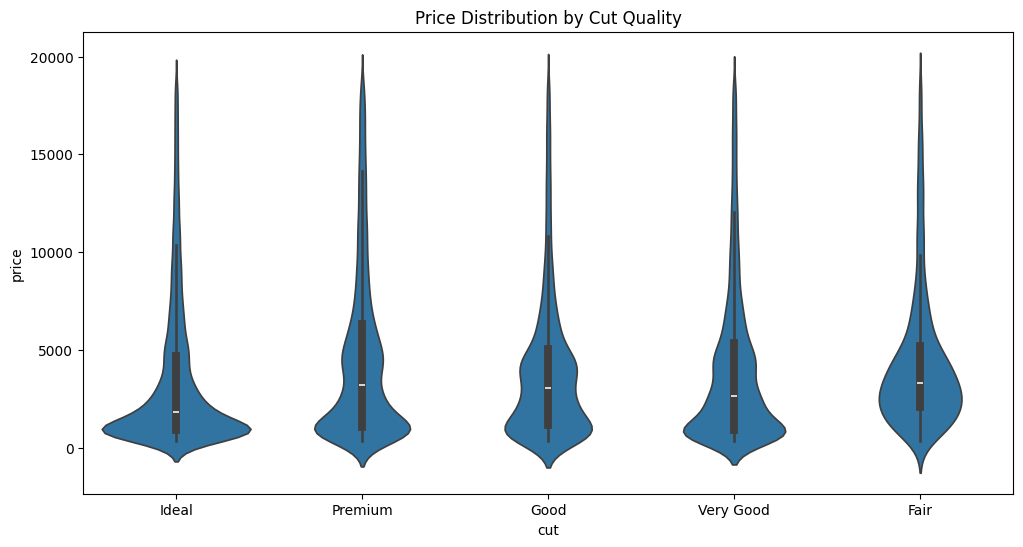

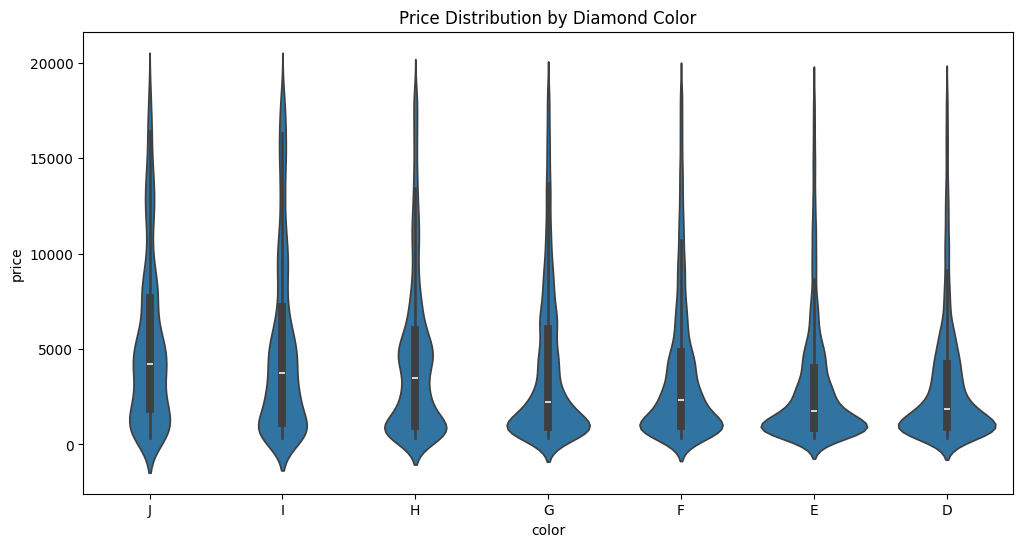

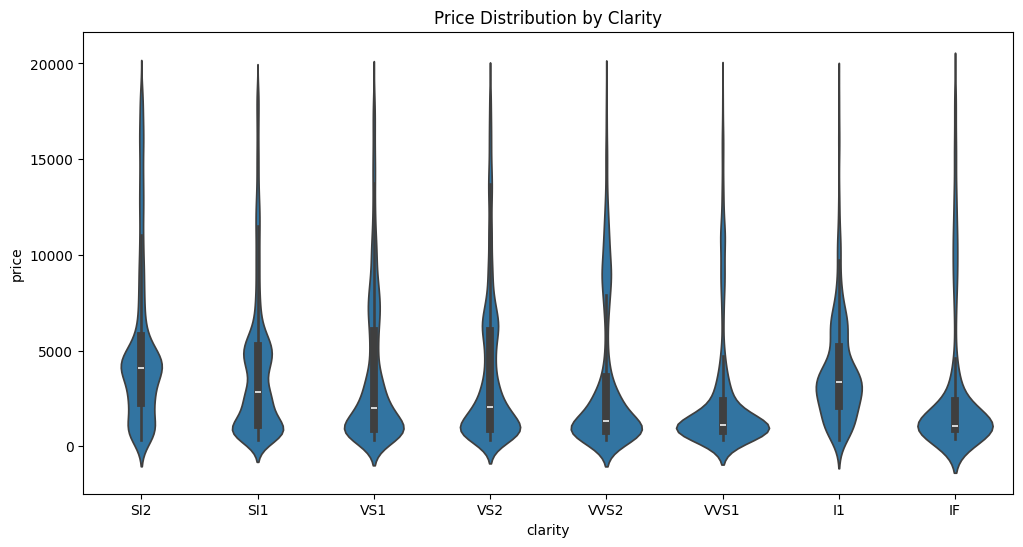

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(data = data, x = 'cut', y = 'price')
plt.title('Price Distribution by Cut Quality')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data = data, x = 'color', y = 'price', order = ['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.title('Price Distribution by Diamond Color')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data = data, x = 'clarity', y = 'price')
plt.title('Price Distribution by Clarity')
plt.show()

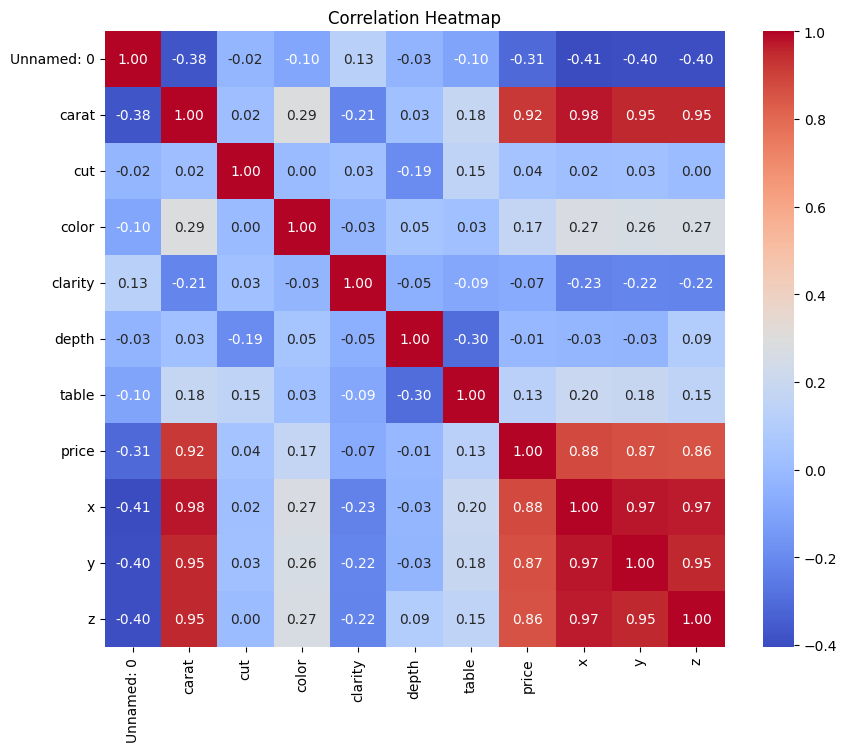

In [9]:
warnings.filterwarnings("ignore")
dt = (data.dtypes == "object")
object_cols = list(dt[dt].index)
label_data = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
correlation_matrix = label_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
data_encoded = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [12]:
column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), object_cols)],
    remainder = 'passthrough'
)

In [13]:
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.fit_transform(X_test)

In [14]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [16]:
cv_scores = cross_val_score(rf_regressor, X_train_encoded, y_train, cv = 5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.9998725  0.99994062 0.99993596 0.99995304 0.99988655]
Mean CV Score: 0.9999177343479773


In [17]:
y_train_pred = rf_regressor.predict(X_train_encoded)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set MEtrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("R-Squared Score: ", train_r2)


Training Set MEtrics:
Mean Absolute Error:  1.1744549499443937
Mean Squared Error:  131.74826960975156
R-Squared Score:  0.9999917242191139


In [18]:
y_test_pred = rf_regressor.predict(X_test_encoded)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("R-squared Score: ", r2_score)


Test Set Metrics:
Mean Absolute Error:  2.7642473118279653
Mean Squared Error:  442.82563909899886
R-squared Score:  <function r2_score at 0x7fe4837b7700>
